In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""Load France Real Estate Sales Data - 2022
"""

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(
    "../data/france_total_real_estate_sales_2022.csv",
    sep=",",
    decimal=",",
    low_memory=False
)

# Display the first few rows of the DataFrame
df.head()


,Date mutation,Nature mutation,Valeur fonciere,No voie,Code voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Type_voie
0,03/01/2022,Vente,55000.0,13.0,2280,1000.0,BOURG-EN-BRESSE,1,53,AM,102,1,Appartement,24.0,1.0,NaN,RUE RUE RUE DE LA LIBERTE
1,03/01/2022,Vente,143000.0,NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,184,0,NaN,NaN,NaN,84.0,CHAMP COCHET
2,03/01/2022,Vente,143000.0,NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,185,0,NaN,NaN,NaN,88.0,CHAMP COCHET
3,03/01/2022,Vente,143000.0,98.0,0055,1480.0,SAVIGNEUX,1,398,ZE,187,1,Appartement,140.0,3.0,NaN,RTE RTE RTE DE LA DOMBES
4,04/01/2022,Vente,300.0,NaN,B031,1480.0,MESSIMY SUR SAONE,1,243,A,643,0,NaN,NaN,NaN,510.0,AUX PIERRES


In [6]:
# Display the shape of the DataFrame
df.shape


(3803885, 17)

In [7]:
# Display concise summary of the DataFrame
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date mutation              str    
 1   Nature mutation            str    
 2   Valeur fonciere            float64
 3   No voie                    str    
 4   Code voie                  str    
 5   Code postal                str    
 6   Commune                    str    
 7   Code departement           str    
 8   Code commune               int64  
 9   Section                    str    
 10  No plan                    int64  
 11  Nombre de lots             int64  
 12  Type local                 str    
 13  Surface reelle bati        str    
 14  Nombre pieces principales  str    
 15  Surface terrain            str    
 16  Type_voie                  str    
dtypes: float64(1), int64(3), str(13)
memory usage: 493.4 MB


In [8]:
# Calculate the percentage of missing values for each column
(df.isna().mean() * 100).sort_values(ascending=False)


Surface reelle bati          39.973396
Nombre pieces principales    39.973396
Type local                   39.918478
No voie                      34.733621
Surface terrain              33.830912
Code postal                   1.029816
Type_voie                     1.029290
Code voie                     1.026398
Valeur fonciere               0.649888
Section                       0.004075
Date mutation                 0.000000
Commune                       0.000000
Nature mutation               0.000000
Code commune                  0.000000
Code departement              0.000000
Nombre de lots                0.000000
No plan                       0.000000
dtype: float64

In [9]:
# Convert specific columns to numeric data types
cols_to_numeric = [
    "Surface reelle bati",
    "Nombre pieces principales",
    "Surface terrain"
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[cols_to_numeric].info()


<class 'pandas.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 3 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Surface reelle bati        float64
 1   Nombre pieces principales  float64
 2   Surface terrain            float64
dtypes: float64(3)
memory usage: 87.1 MB


In [10]:
# Display statistical summary of the target variable
df["Valeur fonciere"].describe()


count    3.779164e+06
mean     7.042585e+05
std      5.876489e+06
min      1.000000e-02
25%      7.871900e+04
50%      1.775000e+05
75%      3.200000e+05
max      1.003401e+09
Name: Valeur fonciere, dtype: float64

In [11]:
# Remove rows with missing target variable
# notna renvoie un masque booléen indiquant les valeurs non manquantes
df = df[df["Valeur fonciere"].notna()]
df.shape


(3779164, 17)

In [12]:
df = df.rename(columns={
    "Date mutation": "date",
    "Nature mutation": "nature_mutation",
    "Valeur fonciere": "prix",
    "Code postal": "code_postal",
    "Commune": "commune",
    "Code departement": "departement",
    "Type local": "type_bien",
    "Surface reelle bati": "surface",
    "Nombre pieces principales": "nb_pieces",
    "Surface terrain": "surface_terrain"
})

df.head()


,date,nature_mutation,prix,No voie,Code voie,code_postal,commune,departement,Code commune,Section,No plan,Nombre de lots,type_bien,surface,nb_pieces,surface_terrain,Type_voie
0,03/01/2022,Vente,55000.0,13.0,2280,1000.0,BOURG-EN-BRESSE,1,53,AM,102,1,Appartement,24.0,1.0,NaN,RUE RUE RUE DE LA LIBERTE
1,03/01/2022,Vente,143000.0,NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,184,0,NaN,NaN,NaN,84.0,CHAMP COCHET
2,03/01/2022,Vente,143000.0,NaN,B010,1480.0,SAVIGNEUX,1,398,ZE,185,0,NaN,NaN,NaN,88.0,CHAMP COCHET
3,03/01/2022,Vente,143000.0,98.0,0055,1480.0,SAVIGNEUX,1,398,ZE,187,1,Appartement,140.0,3.0,NaN,RTE RTE RTE DE LA DOMBES
4,04/01/2022,Vente,300.0,NaN,B031,1480.0,MESSIMY SUR SAONE,1,243,A,643,0,NaN,NaN,NaN,510.0,AUX PIERRES


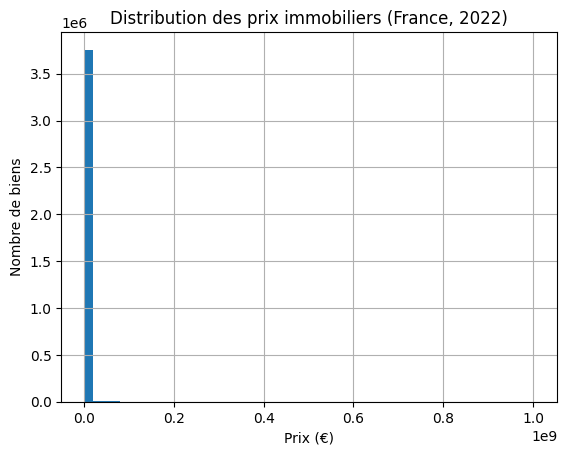

In [13]:
import matplotlib.pyplot as plt
# Visualize the distribution of property prices
df["prix"].hist(bins=50)
plt.title("Distribution des prix immobiliers (France, 2022)")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de biens")
plt.show()


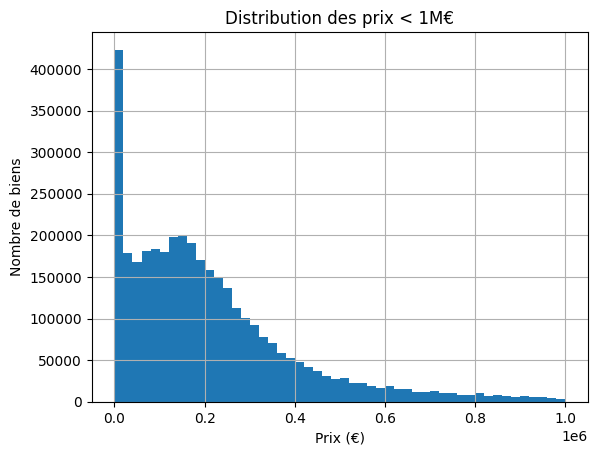

In [14]:
# Visualize the distribution of property prices below 1 million euros
df[df["prix"] < 1_000_000]["prix"].hist(bins=50)
plt.title("Distribution des prix < 1M€")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de biens")
plt.show()


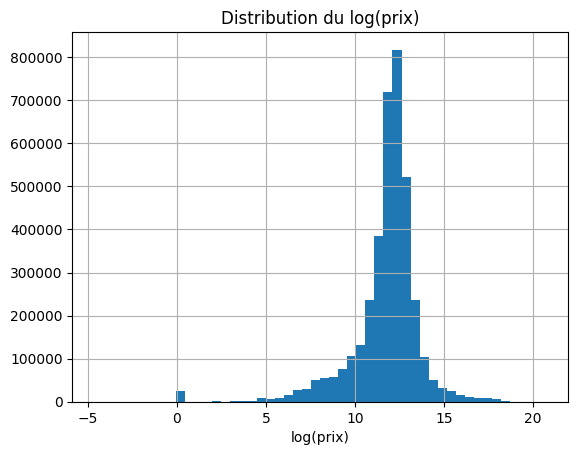

In [15]:
import numpy as np
# Visualize the distribution of the logarithm of property prices
df["log_prix"] = np.log(df["prix"])

df["log_prix"].hist(bins=50)
plt.title("Distribution du log(prix)")
plt.xlabel("log(prix)")
plt.show()


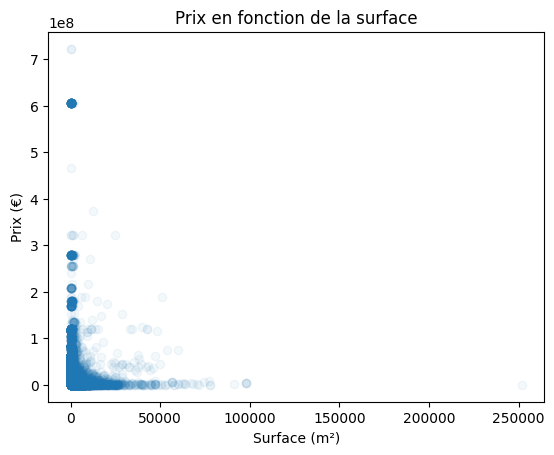

In [16]:
# Visualize the relationship between surface area and price
plt.scatter(df["surface"], df["prix"], alpha=0.05) # alpha pour la transparence des points
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.title("Prix en fonction de la surface")
plt.show()


In [17]:
# Surfaces irréalistes
df.loc[df["surface"] <= 0, "surface"] = np.nan
df.loc[df["surface"] > 500, "surface"] = np.nan

# Prix irréalistes
df = df[df["prix"] < 5_000_000]


In [18]:
df["surface"].describe()


count    1.228922e+06
mean     8.407769e+01
std      5.384574e+01
min      1.000000e+00
25%      4.900000e+01
50%      7.500000e+01
75%      1.040000e+02
max      5.000000e+02
Name: surface, dtype: float64

In [19]:
df.shape


(3714690, 18)

In [20]:
# Prix au m² (attention: surface peut être NaN)
df["prix_m2"] = df["prix"] / df["surface"]

# Indicateurs "info connue"
df["surface_connue"] = df["surface"].notna().astype(int)
df["pieces_connues"] = df["nb_pieces"].notna().astype(int)
df["terrain_connu"] = df["surface_terrain"].notna().astype(int)


In [21]:
# Convert additional columns to numeric data types
df["nb_pieces"] = pd.to_numeric(df["nb_pieces"], errors="coerce")
df["surface_terrain"] = pd.to_numeric(df["surface_terrain"], errors="coerce")


In [22]:
# One-hot encode the "type_bien" categorical variable
df["type_bien"] = df["type_bien"].fillna("Inconnu")
df = pd.get_dummies(df, columns=["type_bien"], drop_first=True)


In [23]:
features = [
    "surface",
    "nb_pieces",
    "surface_terrain",
    "surface_connue",
    "pieces_connues",
    "terrain_connu",
    "prix_m2",
]

# Ajoute automatiquement les colonnes one-hot créées (type_bien_...)
features += [c for c in df.columns if c.startswith("type_bien_")]
# Prépare les matrices X et y pour le modèle
X = df[features]
y = df["log_prix"]
# Display the shapes of X and y
X.shape, y.shape


((3714690, 11), (3714690,))

In [24]:
# On remplace les NaN par la médiane (simple, robuste)
X = X.fillna(X.median(numeric_only=True))


In [25]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model
lin = LinearRegression()
lin.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error
# Make predictions on the test set
y_pred = lin.predict(X_test)
print("R² (log_prix):", r2_score(y_test, y_pred))
print("MAE (mean absolute error) (log_prix):", mean_absolute_error(y_test, y_pred))


R² (log_prix): 0.13064319511194578
MAE (mean absolute error) (log_prix): 1.116004454582603


In [28]:
import numpy as np
# Calculate and display the Mean Absolute Error (MAE) in log scale and its exponential equivalent
mae_log = mean_absolute_error(y_test, y_pred)
print("MAE log =", mae_log)
print("Multiplicative error factor ≈", np.exp(mae_log))




MAE log = 1.116004454582603
Multiplicative error factor ≈ 3.052632870829336


In [29]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100, # Nombre d'arbres dans la forêt
    max_depth=20,
    random_state=42,
    n_jobs=-1 # Utilise tous les cœurs CPU disponibles
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [30]:
y_pred_rf = rf.predict(X_test)

print("R² RF (log_prix):", r2_score(y_test, y_pred_rf))
print("MAE RF (log_prix):", mean_absolute_error(y_test, y_pred_rf))


R² RF (log_prix): 0.29778097228296263
MAE RF (log_prix): 0.8383655648541559


In [31]:
mae_log_rf = mean_absolute_error(y_test, y_pred_rf)
print("Multiplicative error factor RF ~", np.exp(mae_log_rf))


Multiplicative error factor RF ~ 2.312584117444814


In [32]:
# Define the list of Île-de-France department codes
idf_deps = ["75", "77", "78", "91", "92", "93", "94", "95"]


In [36]:
df["code_postal_num"] = pd.to_numeric(
    df["code_postal"],
    errors="coerce"
)

df["code_postal_str"] = (
    df["code_postal_num"]
    .fillna(0)
    .astype(int)
    .astype(str)
    .str.zfill(5)
)

df["code_departement"] = df["code_postal_str"].str[:2]


In [ ]:
# Identify the one-hot encoded columns for property types
type_bien_cols = [col for col in df.columns if col.startswith("type_bien_")]

type_bien_cols


['type_bien_Dépendance',
 'type_bien_Inconnu',
 'type_bien_Local industriel. commercial ou assimilé',
 'type_bien_Maison']

In [ ]:
# Filter the DataFrame for properties that are not houses and located in Île-de-France
df_model = df[
    (df[type_bien_cols].sum(axis=1) == 0) &
    (df["code_departement"].isin(idf_deps))
].copy()

df_model.shape


In [ ]:
# Calculate price per square meter for the filtered DataFrame
df_model["prix_m2"] = df_model["prix"] / df_model["surface"]


In [ ]:
# Apply additional filtering criteria to the DataFrame (suppress outliers)
df_model = df_model[
    (df_model["surface"] > 10) &
    (df_model["surface"] < 200) &
    (df_model["prix_m2"] < 20_000)
]


In [42]:
df_model[["surface", "prix", "prix_m2"]].describe()


,surface,prix,prix_m2
count,131318.000000,1.313180e+05,1.313180e+05
mean,55.290364,4.907468e+05,1.072572e+04
std,29.771265,6.063704e+05,2.055799e+04
min,1.000000,1.500000e-01,2.173913e-03
25%,34.000000,1.850000e+05,3.833333e+03
50%,51.000000,2.910000e+05,6.625000e+03
75%,70.000000,5.250000e+05,1.064472e+04
max,460.000000,4.978800e+06,1.879518e+06


In [ ]:
import numpy as np
# Prepare features and target variable for modeling
features = [
    "surface",
    "nb_pieces",
    "prix_m2"
]
# Ajoute automatiquement les colonnes one-hot créées (type_bien_...)
X = df_model[features]
y = np.log(df_model["prix"])


In [44]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest Regressor with adjusted hyperparameters
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=25,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",25
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate the Random Forest model
print("R² (log_prix):", r2_score(y_test, y_pred_rf))
print("MAE (log_prix):", mean_absolute_error(y_test, y_pred_rf))


R² (log_prix): 0.9993143935754486
MAE (log_prix): 0.005525748960364506


In [ ]:
# Calculate and display the Mean Absolute Error (MAE) for the Random Forest model
mae_log_rf = mean_absolute_error(y_test, y_pred_rf)
# Convert MAE from log space to multiplicative error factor
print("Multiplicative error factor ~", np.exp(mae_log_rf))


Multiplicative error factor ~ 1.0055410440704864


In [49]:
import pandas as pd

importances = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importances
# Calculate price per square meter for the filtered DataFrame

prix_m2      0.800173
surface      0.199791
nb_pieces    0.000037
dtype: float64

<Axes: title={'center': 'Feature importance – Random Forest (Appartements IDF)'}>

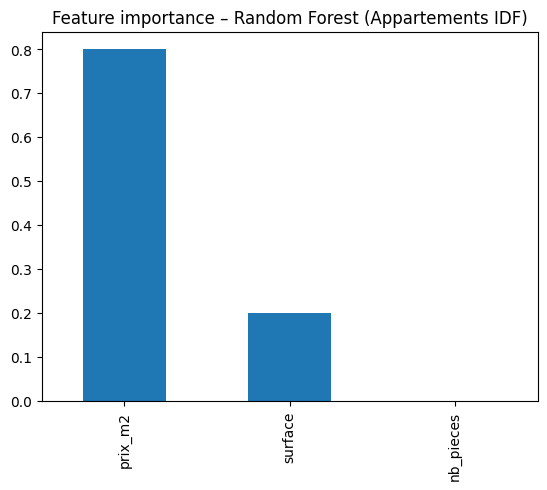

In [50]:
# Plot feature importances
importances.plot(
    kind="bar",
    title="Feature importance – Random Forest (Appartements IDF)"
)
